#### **Formulate LP Model for determining Optimum Advertising Mix**

We can find the optimum advertising mix by formulating the problem as a linear optimization problem. The objective function would represent the total cost or profit associated with the advertising mix, and the constraints would represent the various resource limitations, such as budget and available media.

The decision variables would represent the amounts of each advertising medium to be used, and the objective function and constraints would be expressed as linear equations or inequalities. The solution to the linear program would then provide the optimal values for the decision variables, which correspond to the optimal advertising mix.

> 4 possible activities:

Search Ads, Facebook Ads, Youtube Ads, Gmail Ads

> What we know about activities from past data:

1. Total spend

2. No of clicks:

cost per click = Total spend/ # of clicks

3. No of of conversions

conversions per $ = # of conversions/Total  spend

4. Total Revenue

ROI = (Total Revenue-Total spend)/ Total spend

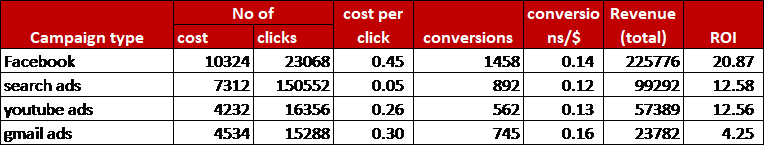

### Objective function and Constraints

Max ROI

s.t.

Total budget     <= $ 49,000

Youtube          >= $ 4,000

Gmail            >= $ 2,000

Total conversions >= 2000

FB               >= Youtube

Search           >= 10% of total

FB+Youtube       >= 50% of total

### Decision Variables

X1 = $ on FB Ads

X2 = $ on Search Ads

X3 = $ on Youtube Ads

X4 = $ on Gmail Ads

#### Percentage Constraints
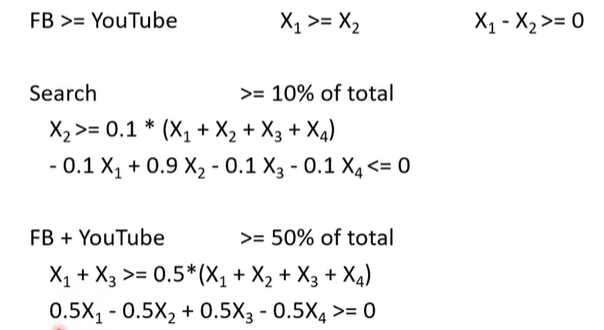

### Formulate LP Problem
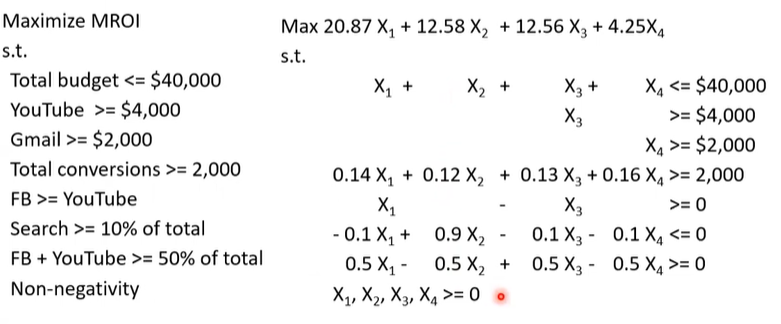

In [9]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 57.3 MB/s eta 0:00:00


In [13]:
import pulp
import pandas as pd
import numpy as np
from pulp.constants import LpMaximize, LpStatus

In [11]:
##define decision variables
X1 = pulp.LpVariable('X1', lowBound=0)
X2 = pulp.LpVariable('X2', lowBound=0)
X3 = pulp.LpVariable('X3', lowBound=0)
X4 = pulp.LpVariable('X4', lowBound=0)

##define objective variable
##'ROI' is the objective variable
ROI = pulp.LpProblem('Maximum ROI', pulp.LpMaximize)

##define objective function
ROI += 20.87*X1 + 12.58*X2 + 12.56*X3 + 4.25*X4, 'Objective function'

##add constraints
ROI += X1 + X2 + X3+ X4 <= 40000, 'constraint for total budget'
ROI += X3 >= 4000, 'constraint for Youtube spent'
ROI += X4 >= 2000, 'constraint for Gmail Spent'
ROI += 0.14*X1 + 0.12*X2 + 0.13*X3 + 0.16*X4 >= 2000, 'constraint for total conversions'
ROI += X1-X3 >= 0, 'constraint for FB and Youtube'
ROI += -0.1*X1 + 0.9*X2 - 0.1*X3 - 0.1*X4 <=0, 'constraint for search and 10% total'
ROI += 0.5*X1 - 0.5*X2 + 0.5*X3 - 0.5*X4 >=0, 'constraint for FB+Youtube and 50% total'

ROI.solve()

/usr/local/lib/python3.8/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


1

In [14]:
print(f"status: {ROI.status}, {LpStatus[ROI.status]}")

status: 1, Optimal


In [15]:
print('Maximum ROI:')
pulp.value(ROI.objective)

Maximum ROI:


768320.0

In [18]:
##display results:

print('Decision variable values at Optimum:')

for variable in ROI.variables():
  print(variable.name,':', variable.varValue)

Decision variable values at Optimum:
X1 : 34000.0
X2 : 0.0
X3 : 4000.0
X4 : 2000.0


### Sensitivity Analysis

##### **Slack/ Surplus Variables**
For Binding constraints: Slack/Surplus = 0

For Non-Binding constraints: Slack/Surplus != 0

Slack/ Surplus has no impact on objective function; it just checks whether there is unused/ under-utilized resources at the optimum

#### **Shadow Price**

Shadow Price is the change in optimal value of the objective function per-unit increase in the value of the constraint, while everything else remains the same.

This impacts the value of the objective function.

In [19]:
sr = [{'Constraint name':cname, 'Slack values': cinfo.slack, 'Shadow prices': cinfo.pi} for cname, cinfo in ROI.constraints.items()]
pd.DataFrame(sr)

,Constraint name,Slack values,Shadow prices
0,constraint_for_total_budget,-0.0,20.87
1,constraint_for_Youtube_spent,-0.0,-8.31
2,constraint_for_Gmail_Spent,-0.0,-16.62
3,constraint_for_total_conversions,-3600.0,-0.00
4,constraint_for_FB_and_Youtube,-30000.0,-0.00
5,constraint_for_search_and_10%_total,4000.0,-0.00
6,constraint_for_FB_Youtube_and_50%_total,-18000.0,-0.00


> We can observe that `constraint_for_total_budget`, `constraint_for_Youtube_spent` & `constraint_for_Gmail_Spent` are binding constraints.

> Slack value for these constraints are zero, that means allocated total budgets are fully utilized at the optimum.

> Shadow price for `constraint_for_total_budget~ is 20.87, means that if we increase total budget in one $, we can gain ROI of 20.87 

> Anyway Shadow prices for Youtube and Gmail spent is negative, means that increasing those spents would result drop in ROI.


> slack value for `constraint_for_total_conversions` is -3600, that means that set up constraint for total conversion is low, it can be increased. 

